In [2]:
import matplotlib.pyplot as plt
from matplotlib import image
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import cv2
import os
from BfTableGenerator import TDmapLoader
from tqdm import tqdm
from Utils import *
from open3d.web_visualizer import draw
from joblib import Parallel, delayed
from VisulizerTools import *
from DDBSCAN import Raster_DBSCAN
from sklearn.cluster import DBSCAN
import time
plt.rcParams["font.family"] = "Times New Roman"
from GeoRefTool import *
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.data import stereo_motorcycle, vortex
from skimage.transform import warp
from skimage.registration import optical_flow_tvl1, optical_flow_ilk
from BfTableGenerator import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Resetting default logger to print to terminal.


In [3]:
db = Raster_DBSCAN(window_size=[5,13],eps = 1.5,min_samples = 8,Td_map_szie = [32,1800])
dbscan = DBSCAN(eps = 1, min_samples = 20)

In [4]:
aggregated_map = []
Inten_maps = []
# pcap_path = r'D:\LiDAR_Data\MidTown\California\2021-12-10-21-0-0.pcap'
pcap_path = r'D:\LiDAR_Data\MicroMobility\2th\2022-09-22-11-30-00.pcap'
end_frame = 18000
lidar_reader = TDmapLoader(pcap_path)
frame_gen = lidar_reader.frame_gen()
for i in tqdm(range(end_frame)):
    Frame = next(frame_gen)
    if Frame is None:
        break 
    Td_map,Int_map = Frame
    aggregated_map.append(Td_map)
    Inten_maps.append(Int_map)
aggregated_map = np.array(aggregated_map)
Inten_maps = np.array(Inten_maps)
thred_map = gen_bckmap(aggregated_map, N = 10,d_thred = 0.08,bck_n = 3 )


100%|███████████████████████████████████████████████████████████████████████████▉| 17987/18000 [12:36<00:00, 23.78it/s]


In [12]:
db = Raster_DBSCAN(window_size=[5,13],eps = 0.2,min_samples = 5,Td_map_szie = [32,1800])
dbscan = DBSCAN(eps = 1, min_samples = 20)
Td_map = aggregated_map[11115]
Foreground_map = ~(np.abs(Td_map - thred_map) <= 1.5).any(axis = 0)
Labeling_map = db.fit_predict(Td_map,Foreground_map)
pcd = get_pcd_colored(Td_map,Labeling_map.astype('int'))
# pcd = get_pcd_colored(Td_map,Foreground_map)

draw(pcd,width=1000,height=1000)

WebVisualizer(window_uid='window_7')

In [22]:
Td_map = aggregated_map[505]
Foreground_map = np.full(Td_map.shape,False)
pcd = get_pcd_colored(Td_map,Foreground_map.astype('int'))
draw(pcd,width=1000,height=1000)

WebVisualizer(window_uid='window_6')

In [15]:
num = []
for i in range(len(aggregated_map)):
    Td_map = aggregated_map[i]
    Foreground_map = ~(np.abs(Td_map - thred_map) <= 1.5).any(axis = 0)
    Labeling_map = db.fit_predict(Td_map,Foreground_map)
    num.append(Labeling_map.max())

KeyboardInterrupt: 

In [19]:
thred_map[0,:,:]

array([[  0.   ,   6.476,   6.492, ...,   2.892,   2.872,   0.   ],
       [ 10.128,  10.128,  10.14 , ...,  10.108,   0.   ,   0.   ],
       [  0.   ,  13.548,  13.572, ...,   3.204,  13.524,  13.54 ],
       ...,
       [  0.   ,   0.   ,  17.432, ...,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   6.044, ...,   5.632,   4.428,   0.   ],
       [  0.   ,   0.   ,   0.   , ...,   0.   , 111.188,   0.   ]])

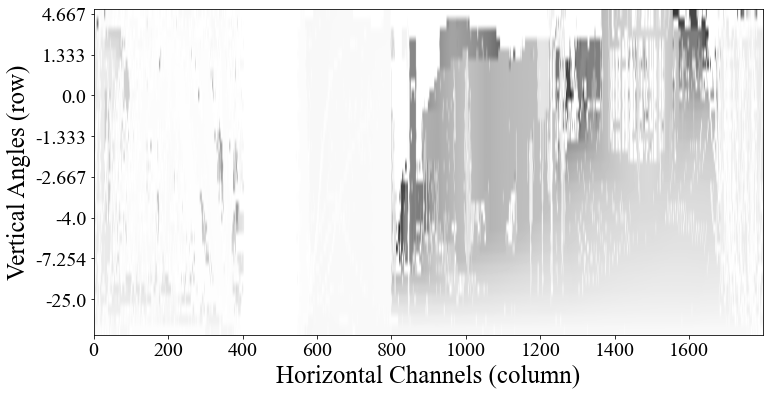

In [20]:
plt.figure(figsize=(12,6))
plt.imshow(thred_map[0,:,:][np.arange(32)[::-1]], aspect='auto',cmap = 'gray_r')
plt.xlabel('Horizontal Channels (column)', fontsize = 25)
plt.ylabel('Vertical Angles (row)', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(np.arange(0,32,4),theta[np.arange(0,32,4)][::-1],fontsize = 20)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\Dissertation\Figs\bcksch.jpg',dpi = 300)
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(Td_map[np.arange(32)[::-1]], aspect='auto',cmap = 'gray_r')
plt.xlabel('Horizontal Channels (column)', fontsize = 25)
plt.ylabel('Vertical Angles (row)', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(np.arange(0,32,4),theta[np.arange(0,32,4)][::-1],fontsize = 20)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\Dissertation\Figs\tdmap.jpg',dpi = 300)
plt.show()

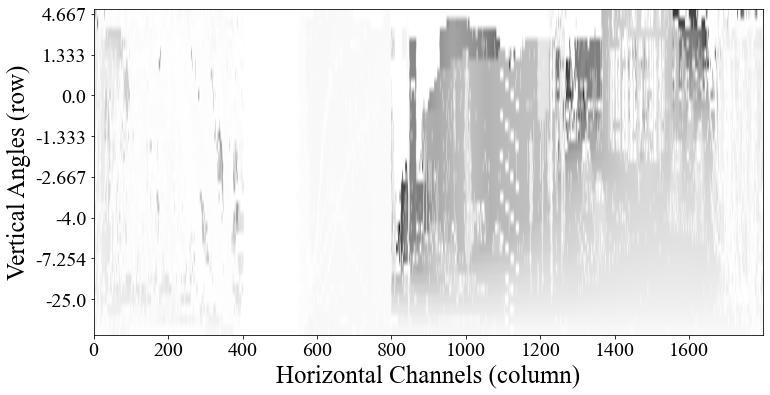

In [12]:
plt.figure(figsize=(12,6))
plt.imshow(Td_map[np.arange(32)[::-1]], aspect='auto',cmap = 'gray_r')
plt.xlabel('Horizontal Channels (column)', fontsize = 25)
plt.ylabel('Vertical Angles (row)', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(np.arange(0,32,4),theta[np.arange(0,32,4)][::-1],fontsize = 20)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\Dissertation\Figs\tdmap.jpg',dpi = 300)
plt.show()

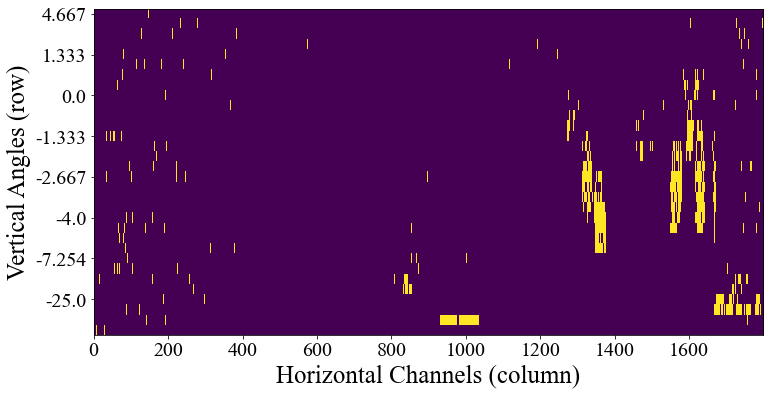

In [24]:
plt.figure(figsize=(12,6))
plt.imshow(Foreground_map[np.arange(32)[::-1]], aspect='auto',interpolation='none')
plt.xlabel('Horizontal Channels (column)', fontsize = 25)
plt.ylabel('Vertical Angles (row)', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(np.arange(0,32,4),theta[np.arange(0,32,4)][::-1],fontsize = 20)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\Dissertation\Figs\foremap.jpg',dpi = 300)
plt.show()

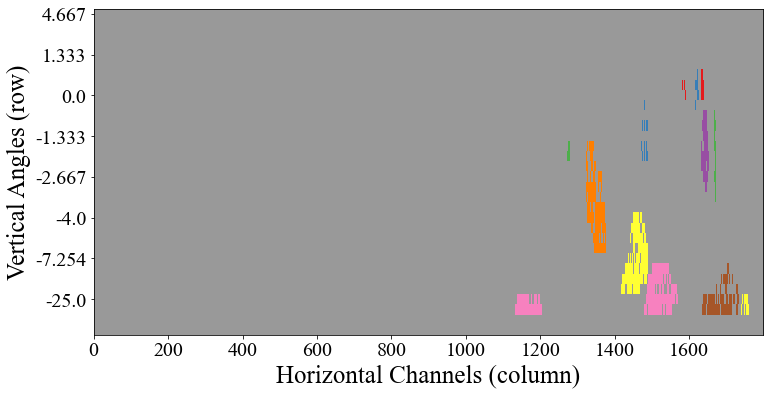

In [41]:
plt.figure(figsize=(12, 6))
plt.imshow(Labeling_map[np.arange(32)[::-1]], aspect='auto', cmap = 'Set1_r',interpolation='none')
plt.xlabel('Horizontal Channels (column)', fontsize = 25)
plt.ylabel('Vertical Angles (row)', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(np.arange(0,32,4),theta[np.arange(0,32,4)][::-1],fontsize = 20)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\Dissertation\Figs\labelmap.jpg',dpi = 300)
plt.show()

In [39]:
Td_map = aggregated_map[546]
Foreground_map = ~(np.abs(Td_map - thred_map) <= 1.5).any(axis = 0)
Labeling_map = db.fit_predict(Td_map,Foreground_map)
DummyMap = np.ones((32,1800))
DummyMap[:,1400:1600] = 0
pcd = get_pcd_colored(Td_map,DummyMap.astype('int'))
# pcd = get_pcd_colored(Td_map,Foreground_map)

draw(pcd,width=1000,height=1000)

WebVisualizer(window_uid='window_21')

In [33]:
Td_map = aggregated_map[546]
Foreground_map = ~(np.abs(Td_map - thred_map) <= 1.5).any(axis = 0)
Labeling_map = db.fit_predict(Td_map,Foreground_map)
# DummyMap = np.ones((32,1800))
# DummyMap[:,1280:1400] = 0
pcd = get_pcd_colored(Td_map,Labeling_map.astype('int'))
# pcd = get_pcd_colored(Td_map,Foreground_map)

draw(pcd,width=1000,height=1000)

WebVisualizer(window_uid='window_15')

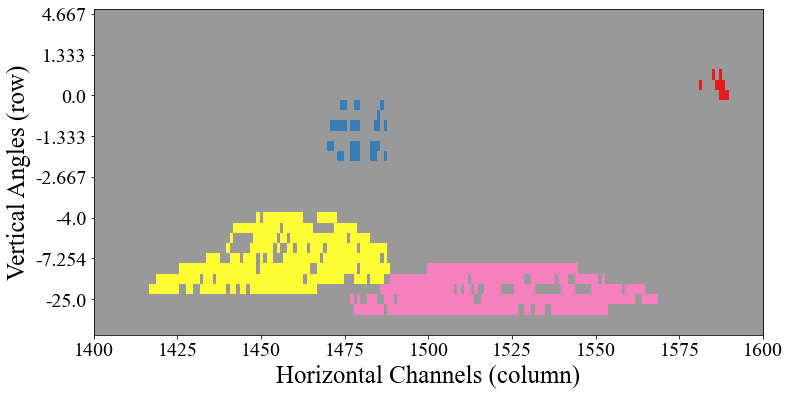

In [40]:
plt.figure(figsize=(12, 6))
plt.imshow(Labeling_map[np.arange(32)[::-1]], aspect='auto', cmap = 'Set1_r',interpolation='none')
plt.xlabel('Horizontal Channels (column)', fontsize = 25)
plt.ylabel('Vertical Angles (row)', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(np.arange(0,32,4),theta[np.arange(0,32,4)][::-1],fontsize = 20)
plt.xlim(1400,1600)
# plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\MOTmanuscript\Figs\labelmap_zoomin.tif',dpi = 300)
plt.show()

In [42]:
Td_map = aggregated_map[547]
Foreground_map = ~(np.abs(Td_map - thred_map) <= 1.5).any(axis = 0)
Labeling_map = db.fit_predict(Td_map,Foreground_map)

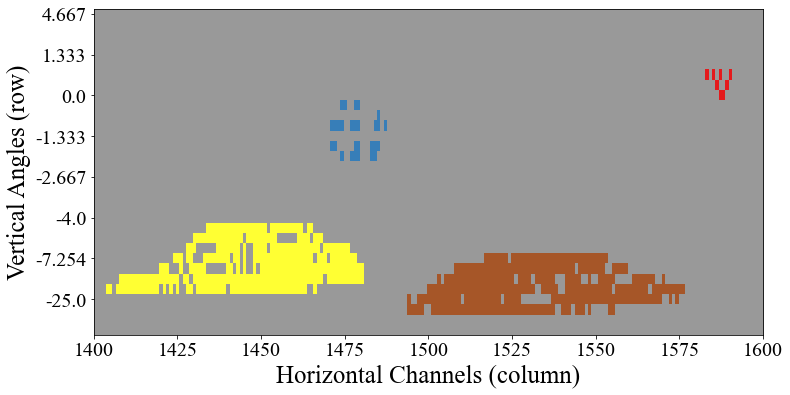

In [43]:
plt.figure(figsize=(12, 6))
plt.imshow(Labeling_map[np.arange(32)[::-1]], aspect='auto', cmap = 'Set1_r',interpolation='none')
plt.xlabel('Horizontal Channels (column)', fontsize = 25)
plt.ylabel('Vertical Angles (row)', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(np.arange(0,32,4),theta[np.arange(0,32,4)][::-1],fontsize = 20)
plt.xlim(1400,1600)
# plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\MOTmanuscript\Figs\labelmap_zoomin.tif',dpi = 300)
plt.show()

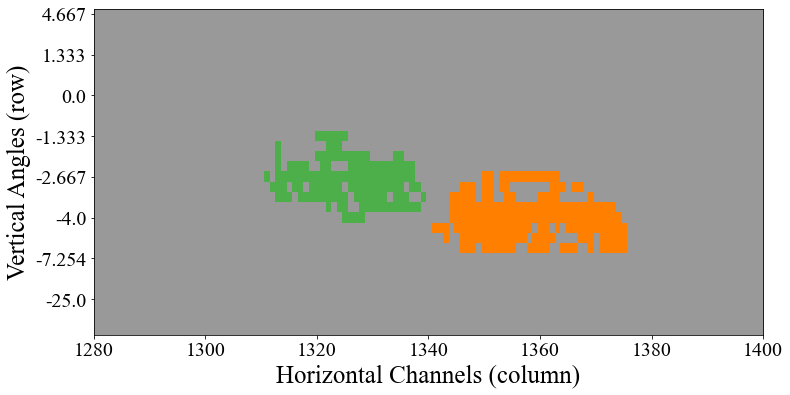

In [14]:
Td_map = aggregated_map[506]
Foreground_map = ~(np.abs(Td_map - thred_map) <= 1.5).any(axis = 0)
Labeling_map = db.fit_predict(Td_map,Foreground_map)
pcd = get_pcd_colored(Td_map,Labeling_map.astype('int'))
# pcd = get_pcd_colored(Td_map,Foreground_map)

# draw(pcd,width=1000,height=1000)
plt.figure(figsize=(12, 6))
plt.imshow(Labeling_map[np.arange(32)[::-1]], aspect='auto', cmap = 'Set1_r')
plt.xlabel('Horizontal Channels (column)', fontsize = 25)
plt.ylabel('Vertical Angles (row)', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(np.arange(0,32,4),theta[np.arange(0,32,4)][::-1],fontsize = 20)
plt.xlim(1280,1400)
# plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\MOTmanuscript\Figs\labelmap_zoomin.tif',dpi = 300)
plt.show()

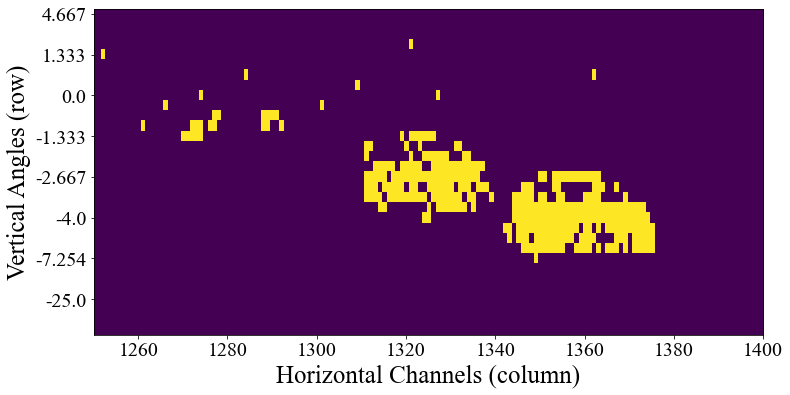

In [79]:
plt.figure(figsize=(12,6))
plt.imshow(Foreground_map[np.arange(32)[::-1]], aspect='auto')
plt.xlabel('Horizontal Channels (column)', fontsize = 25)
plt.ylabel('Vertical Angles (row)', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(np.arange(0,32,4),theta[np.arange(0,32,4)][::-1],fontsize = 20)
plt.xlim(1250,1400)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\MOTmanuscript\Figs\foremap_zoomin.tif',dpi = 300)
plt.show()

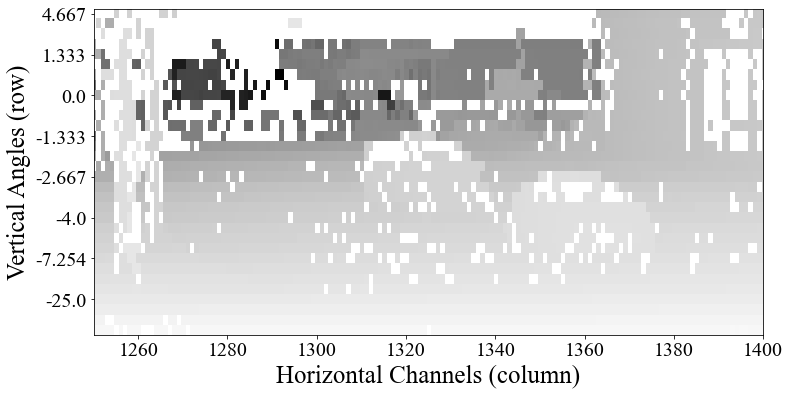

In [80]:
plt.figure(figsize=(12,6))
plt.imshow(Td_map[np.arange(32)[::-1]], aspect='auto',cmap = 'gray_r')
plt.xlabel('Horizontal Channels (column)', fontsize = 25)
plt.ylabel('Vertical Angles (row)', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(np.arange(0,32,4),theta[np.arange(0,32,4)][::-1],fontsize = 20)
plt.xlim(1250,1400)
plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\MOTmanuscript\Figs\tdmap_zoomin.tif',dpi = 300)
plt.show()

In [86]:
input_file_path = r'D:\LiDAR_Data\MidTown\Larue\PaperPcaps_22\2022-1-22-0-0-0.pcap'

In [90]:
with open(input_file_path, 'rb') as fpcap:
    lidar_reader = dpkt.pcap.Reader(fpcap)
    ts,buf = next(lidar_reader)

In [96]:
with open(input_file_path, 'rb') as fpcap:
    lidar_reader = dpkt.pcap.Reader(fpcap)
    while True:
        
        try:
            ts,buf = next(lidar_reader)
            eth = dpkt.ethernet.Ethernet(buf)
        except:
            break
        
        if eth.type == 2048: # for ipv4
            if type(eth.data.data) == dpkt.udp.UDP:
                data = eth.data.data.data
                packet_status = eth.data.data.sport
                
                if packet_status == 2368:
                    if len(data) == 1206:
                        print(ts)
                        break

1642838399.939511
